# Kollokasjoner for nøkkelord

In [2]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle

In [3]:
css()

In [148]:
mu.code_toggle()

In [4]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += "<span style='font-size:150%'>{stuff}</span>".format(stuff= ', '.join(categories['propr']))
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [5]:
import pandas as pd

In [6]:
import ast

In [7]:
#colls_before = pd.read_json('demokrati_before.json')

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [34]:
cliques = lambda G: [list(x) for  x in list(gnl.make_cliques_from_graph(G.to_undirected())[1].values())]
    

## Definer nøkkelordet

noteboken blir kjørt flere ganger, en notebook for hvert nøkkelord, *influensa*, *helse*

In [45]:
keyword = 'influensa'

In [11]:
keyword_graph = nb.make_graph(nøkkelord, cutoff=16)

In [12]:
comm = gnl.community_dict(keyword_graph)

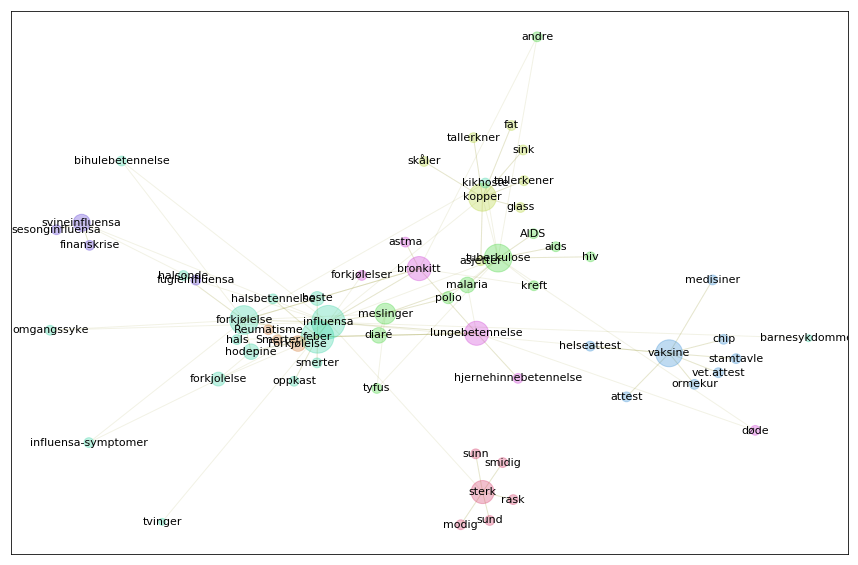

In [16]:
gnl.show_graph(keyword_graph, spread=0.8, fontsize=11)

In [35]:
keyword_cliques = cliques(keyword_graph)

# Grafens klikkstruktur (klikk = clique)

Klikkstrukturen er fin for å se overlapp og forskjellige kontekster hvor nøkkelordet forekommer. 

In [38]:
for i in keyword_cliques:
    mu.printmd("<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(i)))

<span style='font-size:1.1em'>forkjølelser ,lungebetennelse ,diaré ,forkjolelse ,hals ,omgangssyke ,forkjølelse ,bronkitt ,hodepine ,Forkjølelse ,influensa ,meslinger ,bihulebetennelse ,Smerter ,hoste ,feber</span>

<span style='font-size:1.1em'>influensa ,tuberkulose ,kopper</span>

<span style='font-size:1.1em'>svineinfluensa ,fugleinfluensa ,influensa</span>

# Topoi fra grafen

Der klikkstrukturen kombinerer færre element, er alle nodene i grafen med og definerer et topos.

In [13]:
pos=""
for x in comm:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n"
mu.printmd(pos)

### kopper-fat
<span style='font-size:1.1em'>kopper, fat, tallerkner, sink, asjetter, glass, tallerkener, skåler</span>
### tuberkulose-meslinger
<span style='font-size:1.1em'>tuberkulose, meslinger, malaria, diaré, polio, aids, tyfus, hiv, kreft, AIDS, andre</span>
### influensa-feber
<span style='font-size:1.1em'>influensa, feber, forkjølelse, hodepine, hoste, forkjolelse, influensa-symptomer, smerter, halsonde, bihulebetennelse, oppkast, omgangssyke, kikhoste, hals, halsbetennelse, barnesykdommer, tvinger</span>
### vaksine-attest
<span style='font-size:1.1em'>vaksine, attest, helseattest, stamtavle, vet.attest, ormekur, chip, medisiner</span>
### svineinfluensa-sesonginfluensa
<span style='font-size:1.1em'>svineinfluensa, sesonginfluensa, finanskrise, fugleinfluensa</span>
### lungebetennelse-bronkitt
<span style='font-size:1.1em'>lungebetennelse, bronkitt, astma, døde, forkjølelser, hjernehinnebetennelse</span>
### sterk-modig
<span style='font-size:1.1em'>sterk, modig, sund, smidig, rask, sunn</span>
### Forkjølelse-Smerter
<span style='font-size:1.1em'>Forkjølelse, Smerter, Reumatisme</span>


# Assosiasjoner fra kollokasjonene

<span style="font-size:150%">nb.collocation(keyword, yearfrom=1950, yearto=2000, before=10, after=10, corpus='avis')</span>


Her ser vi først på referansekorpuset, og validerer det. Det er gruppert på tiår.

In [39]:
reference = pd.read_json('avis_agg.json')

In [55]:
barchart = lambda word, df: df.loc[word].plot(kind='bar', rot=0, figsize=(10,5),title=word);

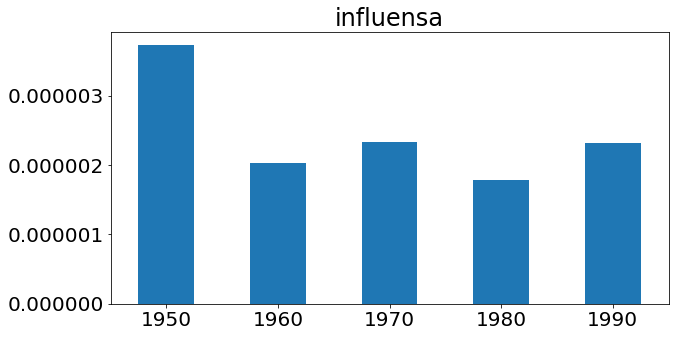

In [56]:
barchart(keyword, reference);

In [61]:
collocations = dict()
step = 1
for i in range(1950, 2000):
    try:
        collocations[i] = nb.collocation('influensa', yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
    except:
        try:
            collocations[i] = nb.collocation('influensa', yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
        except:
            print("gir opp", i)

In [62]:
colls = nb.frame(collocations)

In [63]:
colls = pd.concat([nb.frame(collocations[i], i) for i in collocations], axis=1).fillna(0)

In [70]:
def group_frames(df, bins=10, mode='rel'):
    agg = pd.DataFrame()
    step = 10
    for i in range(0, len(df.columns), step):
        agg[df.columns[i]] = df[df.columns[i:i+step]].sum(axis=1)
    return agg

In [71]:
agg = group_frames(colls)

In [74]:
nb.normalize_corpus_dataframe(agg)

True


# Opptelling

In [72]:
reference.sort_values(by=reference.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.0678003,0.0636145,0.0626906,0.0639755,0.0677927
",",0.0422489,0.0412801,0.0360161,0.0375341,0.0360303
i,0.0245355,0.0246246,0.0241509,0.0223459,0.020813
og,0.0207927,0.021255,0.0188187,0.0187015,0.0167394
er,0.0112082,0.0110687,0.0112091,0.0109266,0.0102024
til,0.0116211,0.0112357,0.0110929,0.010449,0.00925942
det,0.011029,0.0104679,0.00987488,0.0087761,0.00727579
som,0.0100824,0.0100878,0.00975404,0.00902762,0.00786269
for,0.00917307,0.00942805,0.00930159,0.00870384,0.00758499
av,0.00976008,0.00965961,0.00918297,0.00824812,0.00709569


In [75]:
agg.sort_values(by=agg.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.04891,0.0462492,0.0534565,0.0595072,0.0599577
",",0.0707739,0.0614809,0.0439987,0.0376175,0.036796
og,0.0218395,0.0277937,0.0319865,0.0332459,0.0259183
i,0.0247934,0.024535,0.0231554,0.0225,0.0240747
av,0.0330956,0.0235973,0.0193761,0.0177441,0.0181697
er,0.0168558,0.0167274,0.0176099,0.0191546,0.0197929
som,0.0114263,0.0128681,0.0137404,0.0129882,0.0127475
en,0.0111629,0.0116592,0.0136312,0.011849,0.0121423
har,0.0119165,0.0132943,0.0135885,0.0137523,0.0141678
det,0.0144368,0.0143289,0.0130472,0.0117269,0.0112345


In [91]:
pmi = pd.DataFrame()
for i in agg:
    pmi[i] = agg[i]**1.02/(pd.concat([agg[i], reference[i]],axis=1).sum(axis=1))

In [109]:
nb.normalize_corpus_dataframe(pmi)

True

# Sammenligner med en referanse


<br>
<br>
<br>
<br>


# De 15 beste for passende kolonne

In [93]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
akutt,8.68766e-05,8.23718e-05,9.05261e-05,7.73173e-05,4.46853e-05
kusma,8.6631e-05,8.2423e-05,9.13475e-05,8.05804e-05,4.49097e-05
vannkopper,8.65071e-05,8.23426e-05,9.0733e-05,8.14049e-05,4.52215e-05
kikhoste,8.64008e-05,7.908e-05,8.58572e-05,7.92291e-05,4.4775e-05
halsesyke,8.62662e-05,8.19211e-05,9.01813e-05,7.94358e-05,4.37875e-05
lungebetennelse,8.58342e-05,8.15487e-05,9.12194e-05,8.4399e-05,4.75234e-05
forkjølelse,8.57697e-05,8.27315e-05,9.34519e-05,8.7788e-05,4.88333e-05
asiatiske,8.57446e-05,7.40054e-05,8.35926e-05,6.55214e-05,4.14877e-05
diaré,8.56919e-05,8.15284e-05,8.94683e-05,8.04672e-05,4.51262e-05
tilfelle,8.52758e-05,7.93862e-05,8.48943e-05,6.8236e-05,3.85953e-05


In [93]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
akutt,8.68766e-05,8.23718e-05,9.05261e-05,7.73173e-05,4.46853e-05
kusma,8.6631e-05,8.2423e-05,9.13475e-05,8.05804e-05,4.49097e-05
vannkopper,8.65071e-05,8.23426e-05,9.0733e-05,8.14049e-05,4.52215e-05
kikhoste,8.64008e-05,7.908e-05,8.58572e-05,7.92291e-05,4.4775e-05
halsesyke,8.62662e-05,8.19211e-05,9.01813e-05,7.94358e-05,4.37875e-05
lungebetennelse,8.58342e-05,8.15487e-05,9.12194e-05,8.4399e-05,4.75234e-05
forkjølelse,8.57697e-05,8.27315e-05,9.34519e-05,8.7788e-05,4.88333e-05
asiatiske,8.57446e-05,7.40054e-05,8.35926e-05,6.55214e-05,4.14877e-05
diaré,8.56919e-05,8.15284e-05,8.94683e-05,8.04672e-05,4.51262e-05
tilfelle,8.52758e-05,7.93862e-05,8.48943e-05,6.8236e-05,3.85953e-05


In [101]:
pmi.sort_values(by=pmi.columns[1], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
forkjølelse,8.57697e-05,8.27315e-05,9.34519e-05,8.7788e-05,4.88333e-05
kusma,8.6631e-05,8.2423e-05,9.13475e-05,8.05804e-05,4.49097e-05
akutt,8.68766e-05,8.23718e-05,9.05261e-05,7.73173e-05,4.46853e-05
vannkopper,8.65071e-05,8.23426e-05,9.0733e-05,8.14049e-05,4.52215e-05
hunder,8.27682e-05,8.21368e-05,9.03622e-05,6.82348e-05,3.08699e-05
skabb,8.51145e-05,8.21254e-05,9.11636e-05,7.19228e-05,4.3078e-05
halsesyke,8.62662e-05,8.19211e-05,9.01813e-05,7.94358e-05,4.37875e-05
lungebetennelse,8.58342e-05,8.15487e-05,9.12194e-05,8.4399e-05,4.75234e-05
diaré,8.56919e-05,8.15284e-05,8.94683e-05,8.04672e-05,4.51262e-05
bamblesyke,8.45167e-05,8.15081e-05,8.92495e-05,0,0


In [100]:
pmi.sort_values(by=pmi.columns[2], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
forkjølelse,8.57697e-05,8.27315e-05,9.34519e-05,8.7788e-05,4.88333e-05
übehag,7.06333e-05,7.95945e-05,9.31007e-05,8.41741e-05,4.52922e-05
feber,8.45512e-05,8.10529e-05,9.20216e-05,8.71663e-05,4.8767e-05
smerter,7.90166e-05,7.68733e-05,9.19078e-05,8.4539e-05,4.55182e-05
plager,7.51671e-05,7.64361e-05,9.17403e-05,8.11633e-05,4.37067e-05
plaget,8.20985e-05,8.05135e-05,9.16887e-05,8.58376e-05,4.74966e-05
sengs,8.45017e-05,8.08266e-05,9.15856e-05,8.50227e-05,4.72336e-05
reumatiske,7.63526e-05,7.76226e-05,9.15466e-05,8.15696e-05,0
kusma,8.6631e-05,8.2423e-05,9.13475e-05,8.05804e-05,4.49097e-05
forkjolelse,8.23131e-05,7.96579e-05,9.13412e-05,8.61336e-05,4.71621e-05


In [99]:
pmi.sort_values(by=pmi.columns[3], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
forkjølelse,8.57697e-05,8.27315e-05,9.34519e-05,8.7788e-05,4.88333e-05
feber,8.45512e-05,8.10529e-05,9.20216e-05,8.71663e-05,4.8767e-05
Ibux,0,0,0,8.64591e-05,4.82227e-05
forkjolelse,8.23131e-05,7.96579e-05,9.13412e-05,8.61336e-05,4.71621e-05
plaget,8.20985e-05,8.05135e-05,9.16887e-05,8.58376e-05,4.74966e-05
Febernedsettende,0,7.21184e-05,8.41293e-05,8.57779e-05,4.48099e-05
doser,6.8495e-05,6.53118e-05,8.66888e-05,8.5551e-05,4.36538e-05
leddsmerter,7.89779e-05,7.41005e-05,0,8.55059e-05,4.55809e-05
angitt,0,0,0,8.54177e-05,0
virksom,6.00532e-05,0,8.36851e-05,8.52943e-05,4.76097e-05


In [98]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
forkjølelse,8.57697e-05,8.27315e-05,9.34519e-05,8.7788e-05,4.88333e-05
feber,8.45512e-05,8.10529e-05,9.20216e-05,8.71663e-05,4.8767e-05
Ibux,0,0,0,8.64591e-05,4.82227e-05
influensa,8.40356e-05,8.01428e-05,9.11709e-05,8.48578e-05,4.79762e-05
vaksine,8.40956e-05,7.92712e-05,9.10215e-05,8.4031e-05,4.76207e-05
virksom,6.00532e-05,0,8.36851e-05,8.52943e-05,4.76097e-05
lungebetennelse,8.58342e-05,8.15487e-05,9.12194e-05,8.4399e-05,4.75234e-05
plaget,8.20985e-05,8.05135e-05,9.16887e-05,8.58376e-05,4.74966e-05
vaksinere,7.88039e-05,7.77998e-05,8.88226e-05,8.28059e-05,4.73089e-05
slitt,0,6.12782e-05,8.36234e-05,8.2503e-05,4.72992e-05


<br>
<br>

# Assosiasjoner og variasjon over år.

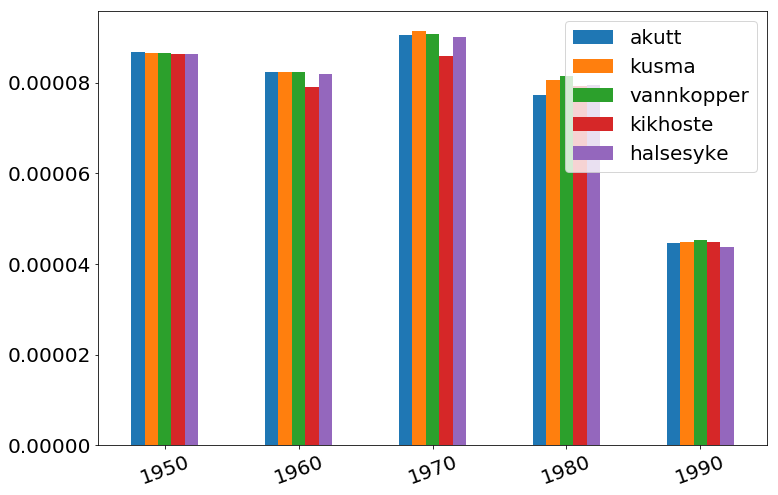

In [107]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

In [117]:
def freq_assoc_val(agg, pmi, col):
    vals = list(pmi.sort_values(by=pmi.columns[col], ascending=False).head(5).fillna(0).index)
    agg.loc[vals].sort_values(by= agg.columns[col], ascending=False).transpose().plot(kind="bar", rot=0, figsize=(12, 8))

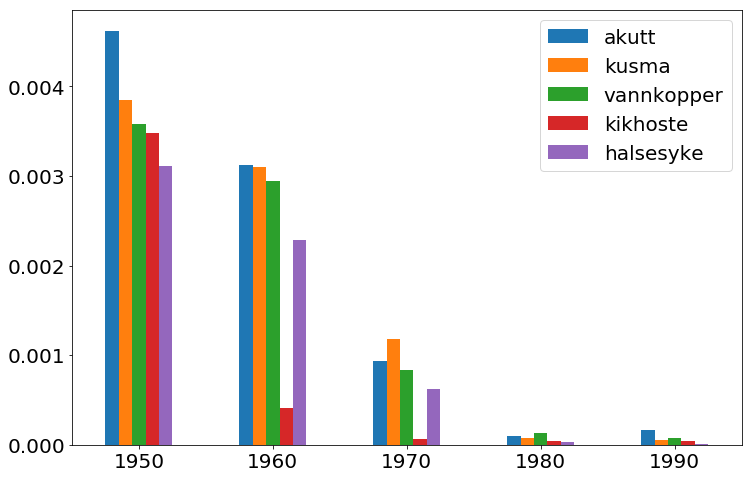

In [118]:
freq_assoc_val(agg, pmi, 0)

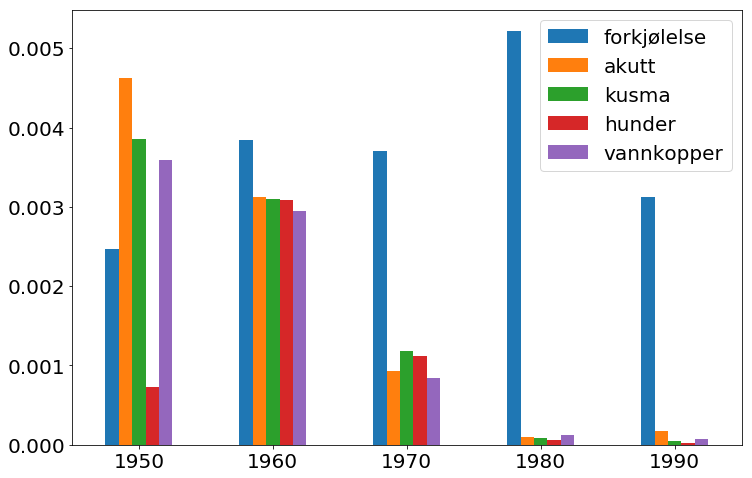

In [125]:
freq_assoc_val(agg, pmi, 1)

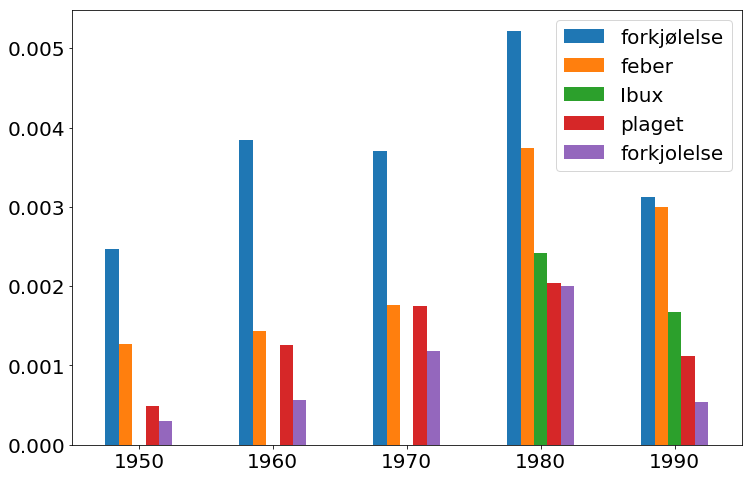

In [127]:
freq_assoc_val(agg, pmi, 3)

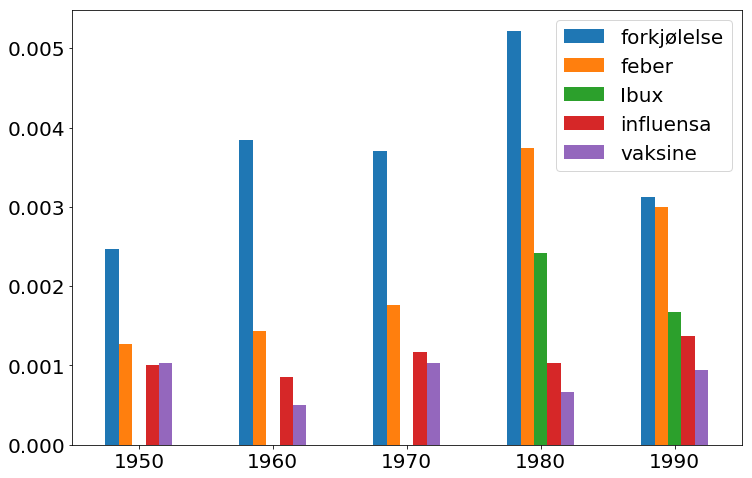

In [128]:
freq_assoc_val(agg, pmi, 4)

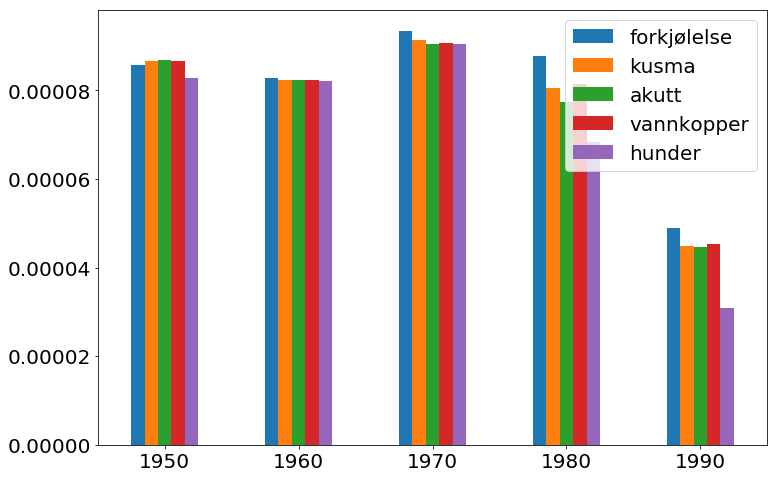

In [120]:
freq_assoc_val(pmi, pmi, 1)

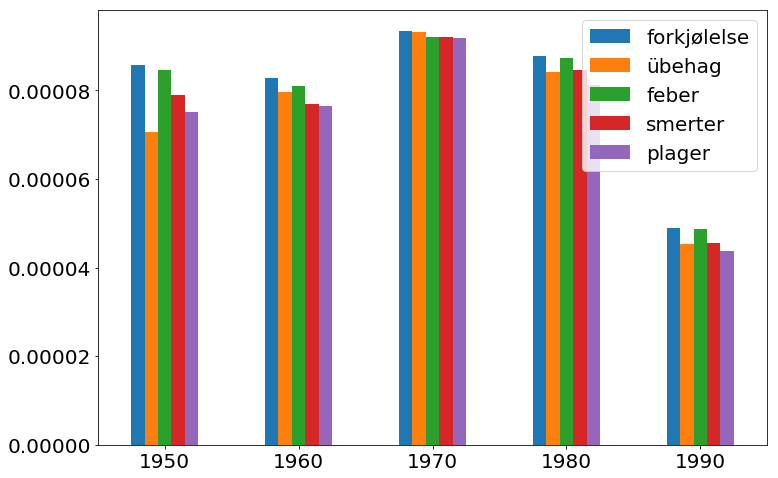

In [121]:
freq_assoc_val(pmi, pmi, 2)

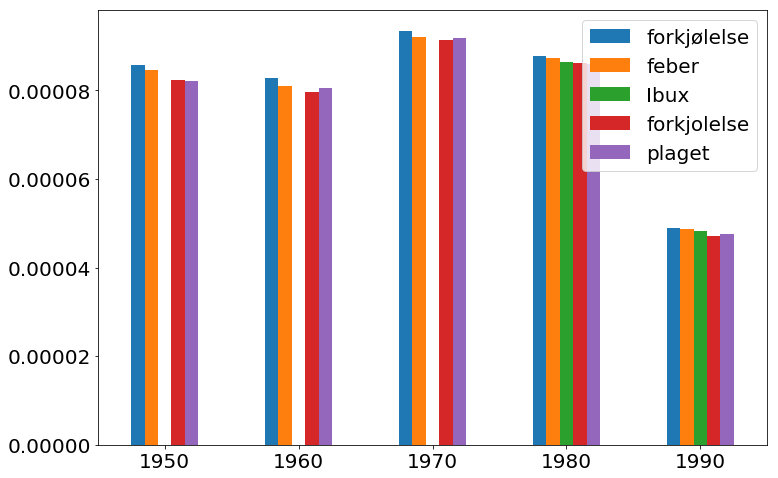

In [123]:
freq_assoc_val(pmi, pmi, 3)

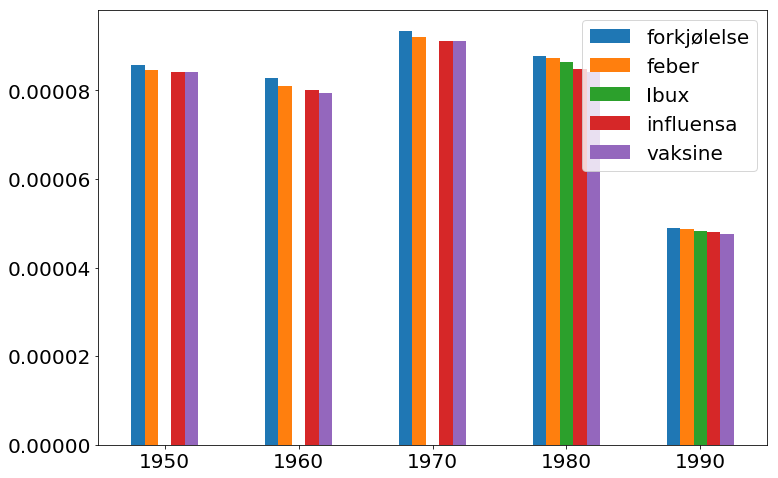

In [124]:
freq_assoc_val(pmi, pmi, 4)

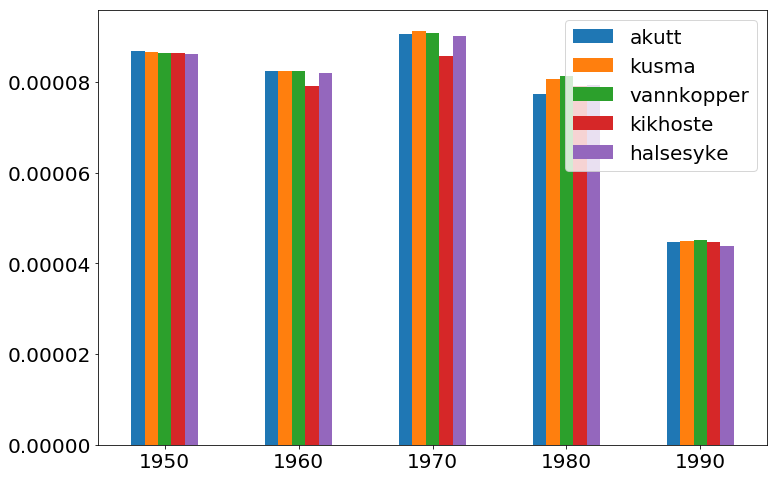

In [119]:
freq_assoc_val(pmi, pmi, 0)

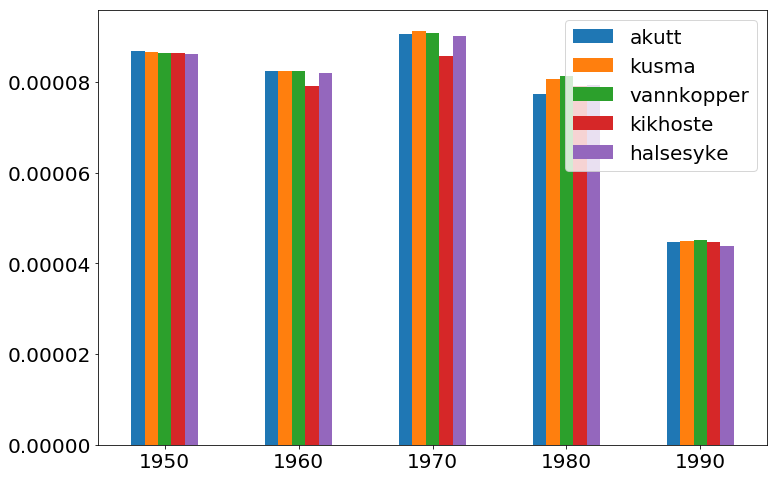

In [119]:
freq_assoc_val(pmi, pmi, 0)

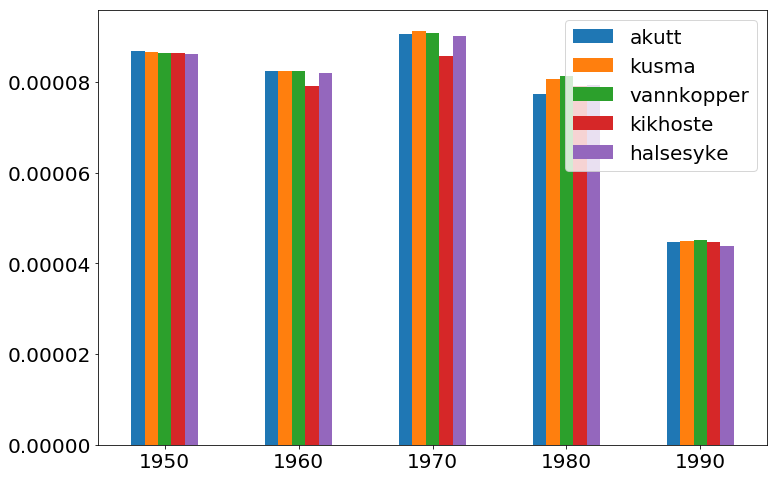

In [119]:
freq_assoc_val(pmi, pmi, 0)

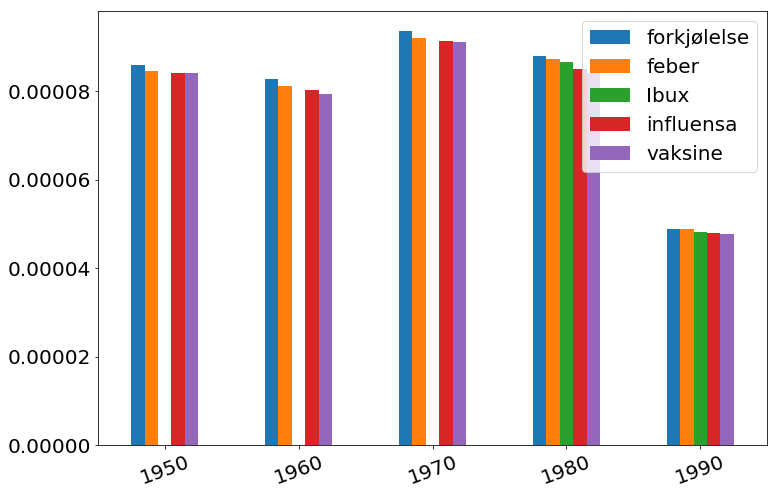

In [110]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

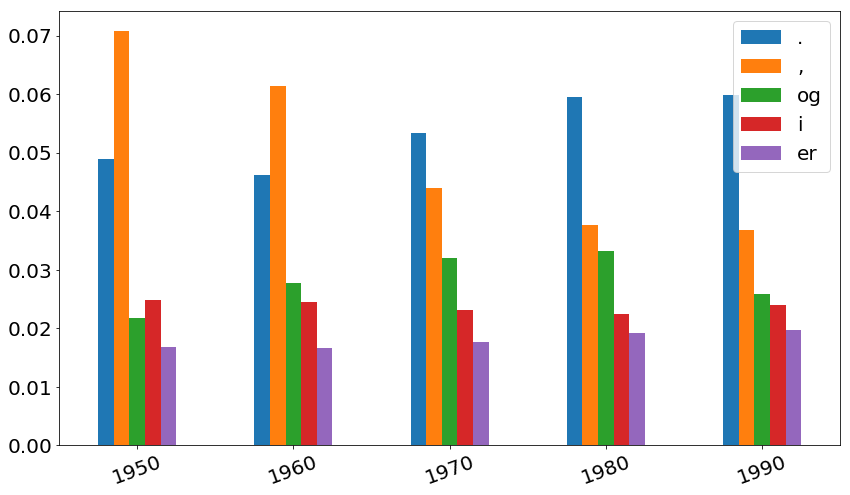

In [130]:
agg.sort_values(by=agg.columns[3], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(14, 8));

<br>
<br>
<br>
<br>

# De hundre ordene med høyest assosiasjon for perioden 1965-1980 sortert på ordklasser

In [131]:
mdprint(pmi.sort_values(by=pmi.columns[2], ascending=False).head(100),-1)

## Benevnelser 
<span style='font-size:150%'>DISPRIL, Dispril, Forkjølelse, Influensa, Anti-neuralgica, Übehag, Meslinger, Giktplager, Influensaen, Formiddagstoner, Antineuralgica, Sykdommen, Hodepine, Menstruasjonssmerter, Vaksine</span>

## subst
<span style='font-size:1.1em'>forkjølelse, feber, kusma, lungebetennelse, influensa, skabb, vaksine, symptomer, vannkopper, lindring, akutt, hunder, snev, virus, meslinger, halsesyke, menstruasjonssmerter, muskelsmerter, rode, diaré, hodepine, tilfeller, bamblesyke, sykdommen, gonoré, giktfeber, sengen, rosen, infeksjonssykdommer, kroppen, sykdommer, bronkitt, tannpine, tuberkulose, epidemi, influensaen, vaksinasjon, faren, symptomene, vaksinen</span>
## unknown
<span style='font-size:1.1em'>übehag, sengs, forkjolelse, forkjølelses-, maveirritasjon, luftveisinfeksjoner, menstruasjons-, oppløs-, forkjolelses-, gonore, halsbetennelse, diarré, forkjelelses-, maveirrilasjon, magesyke</span>
## verb
<span style='font-size:1.1em'>smerter, plager, plaget, anbefales, vaksinert, siver, kontaktes, pådratt, rammet, vaksinere, herjer, egnet, forfall, lege, herjet, stoffet, lindrer, kopper, plages, pådro</span>
## adj
<span style='font-size:1.1em'>reumatiske, virksomme, sengeliggende, langvarige, syk, vanligste, indisponert, epidemisk, akutte</span>
## fork
<span style='font-size:1.1em'>f.eks.</span>


# Hvordan utvikler ordene seg?

In [132]:
barchart = lambda w, title='': pmi.loc[w].transpose().plot(kind='bar',title=title, rot=20, figsize=(12,6)) ;

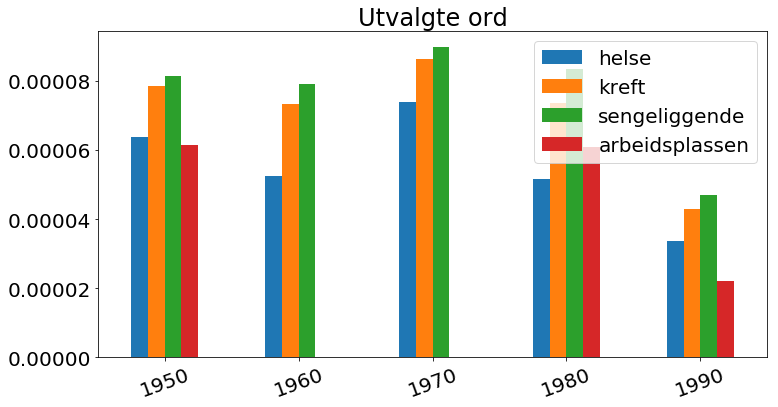

In [133]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord');

<br>
<br>

# Sjekk ut vanlige ord

Bare for å se at de har lave verdier og er stabile gjennom kollokasjonen

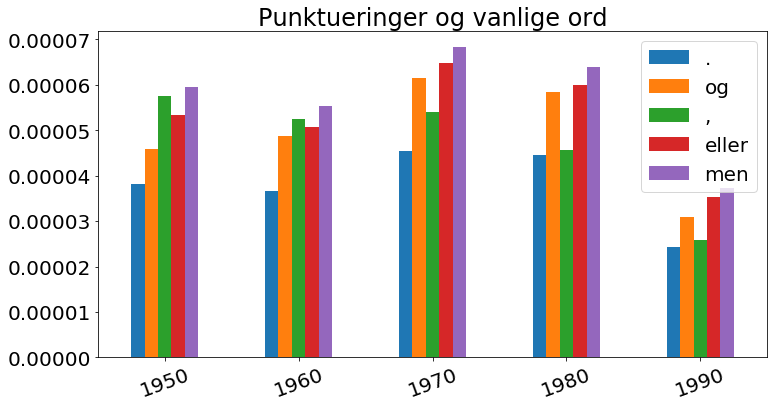

In [134]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord');

<br>
<br>

# De fremste blandt topoi 

Merk at på grunn av louvain-algoritmen kan topoiene endre seg litt fra kjøring til kjøring

In [135]:
commchart = lambda x, part =(1,6): barchart(comm[list(comm.keys())[x]][part[0]:part[1]], list(comm.keys())[x]);

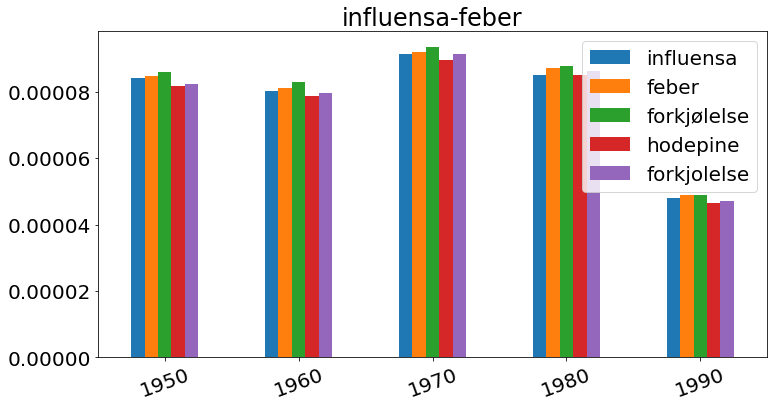

In [136]:
commchart(2, (0,5));

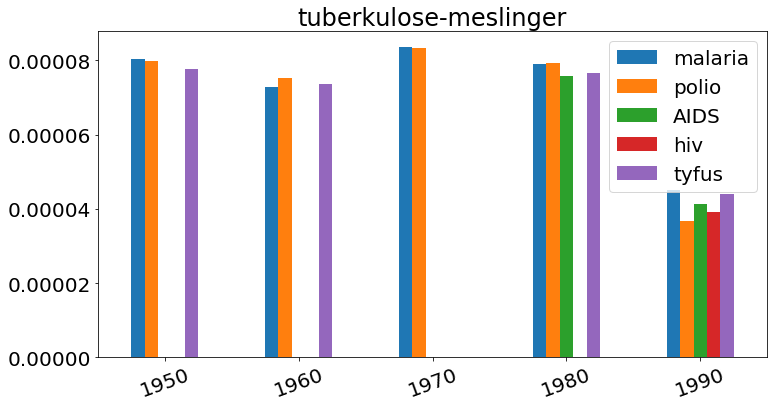

In [137]:
commchart(1, (3, 8))

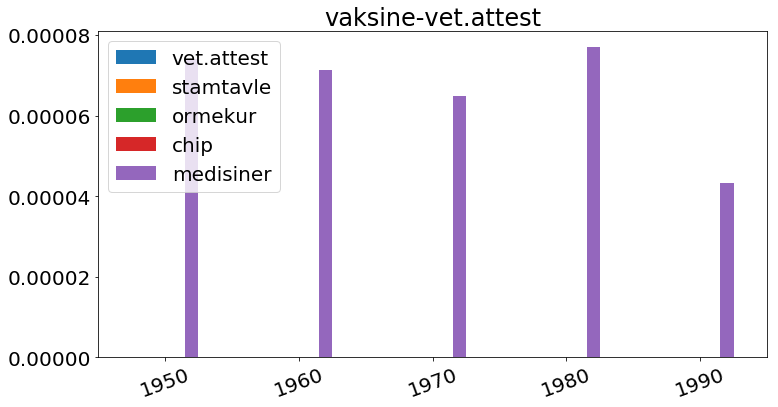

In [138]:
commchart(3)